In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",") 
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
data.shape

(4383, 5)

In [4]:
data.index

RangeIndex(start=0, stop=4383, step=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [7]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


Делаем столбец `Date` индексом

In [8]:
data = data.set_index('Date')
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [9]:
data.shape

(4383, 4)

In [10]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Могут появиться строки с NaN

Сами Nan-ы

In [11]:
data.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [12]:
data_freq = data.asfreq('D', method = 'ffill')
data_freq.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq='D')

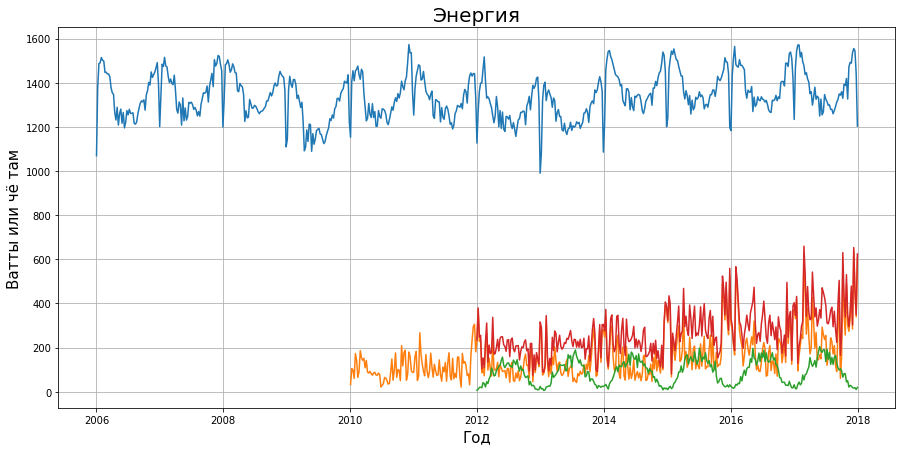

In [13]:
fig, ax1 = plt.subplots(1,figsize=(15,7))
ax1.plot(data.resample('W').mean())
ax1.grid()
ax1.set_title('Энергия', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Ватты или чё там', fontsize = 15);

In [14]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [15]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_max = data[data_columns].resample('M').max()
data_weekly_max

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1613.31200,NaN,NaN,NaN
2006-02-28,1606.66700,NaN,NaN,NaN
2006-03-31,1545.83400,NaN,NaN,NaN
2006-04-30,1447.79800,NaN,NaN,NaN
2006-05-31,1380.17500,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1434.05200,455.379,216.117,601.010
2017-09-30,1460.61621,761.751,168.123,838.572
2017-10-31,1508.51484,819.818,123.715,846.617


In [16]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


In [17]:
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()
data_365d_rol

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,NaN,NaN,NaN,NaN
2017-12-28,NaN,NaN,NaN,NaN
2017-12-29,NaN,NaN,NaN,NaN


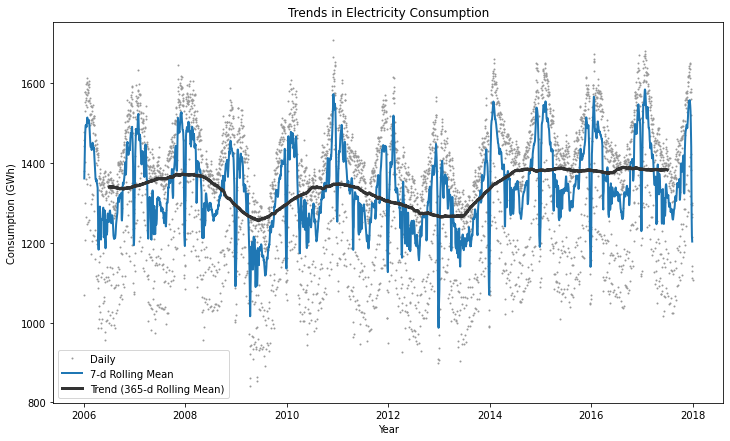

In [18]:
# годовой тренд в зависимости от дневного и 7-дневного скользящего среднего
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,7))
# plotting daily data
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['Consumption'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
# ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

            Consumption     Wind   Solar  Wind+Solar
Date                                                
2006-01-01          NaN      NaN     NaN         NaN
2006-01-02    311.33700      NaN     NaN         NaN
2006-01-03     62.01200      NaN     NaN         NaN
2006-01-04     14.68400      NaN     NaN         NaN
2006-01-05     19.91400      NaN     NaN         NaN
...                 ...      ...     ...         ...
2017-12-27    133.82408 -322.946 -14.393    -337.339
2017-12-28     35.92307  111.917  -2.368     109.549
2017-12-29     -4.77645   77.853  15.692      93.545
2017-12-30    -79.63856  136.970 -22.387     114.583
2017-12-31   -108.33409   -0.071  12.513      12.442

[4383 rows x 4 columns]


Text(0, 0.5, 'Ватты или чё там')

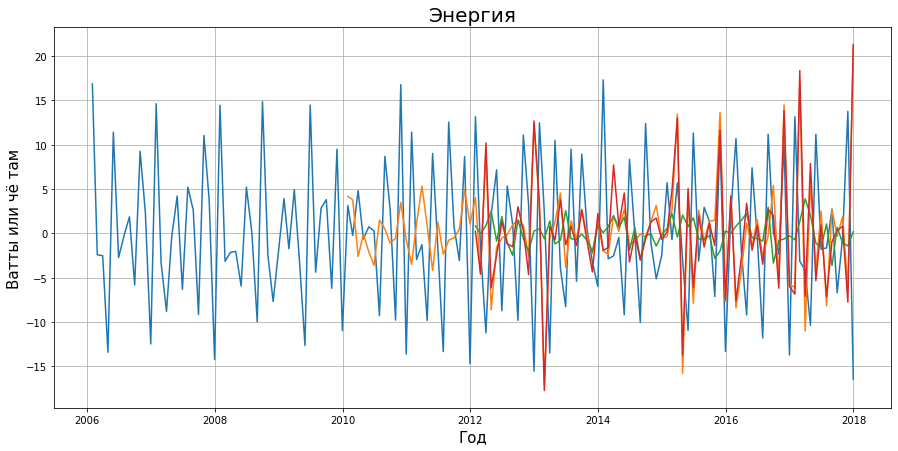

In [19]:
Dt = data.diff()
print(Dt)

fig, ax1 = plt.subplots(1,figsize=(15,7))
ax1.plot(Dt.resample('M').mean())
ax1.grid()
ax1.set_title('Энергия', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Ватты или чё там', fontsize = 15)

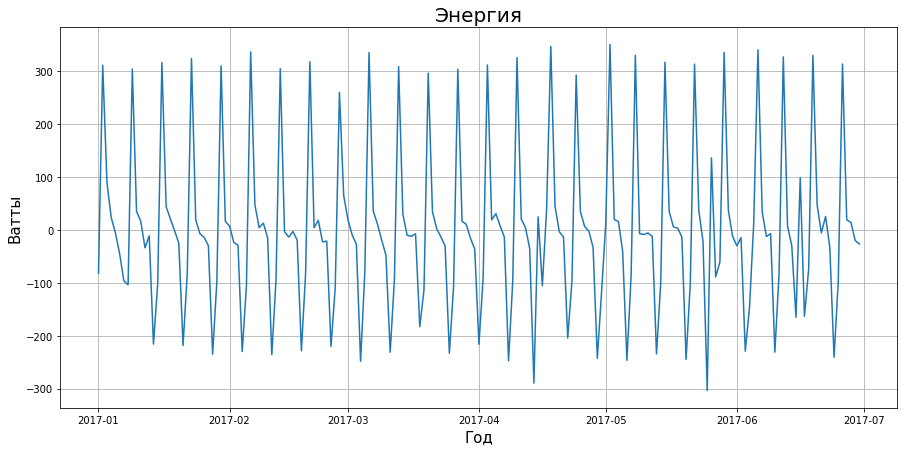

In [20]:
fig, ax1 = plt.subplots(1,figsize=(15,7))
ax1.plot(Dt.loc['2017-01':'2017-06', 'Consumption'])
ax1.grid()
ax1.set_title('Энергия', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Ватты', fontsize = 15);

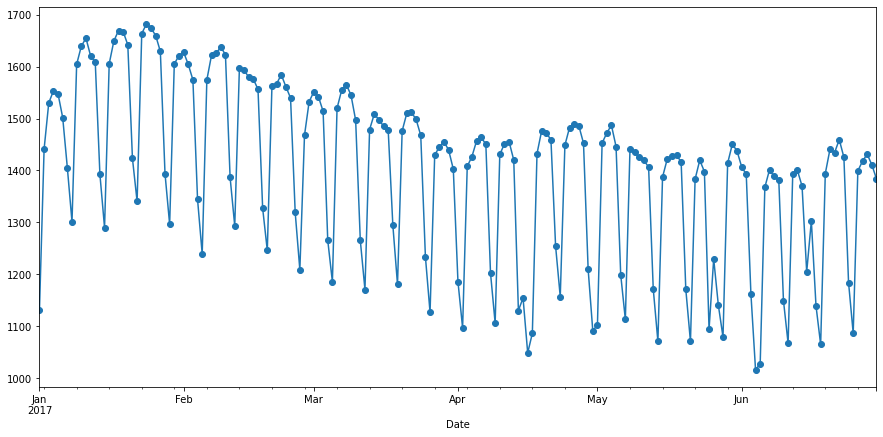

In [21]:
data.loc['2017-01':'2017-06', 'Consumption'].plot(figsize=(15,7), marker = 'o');

In [22]:
# pd.plotting.autocorrelation(data.loc['2017-01':'2017-06', 'Consumption'])

In [23]:
# import seaborn as sns
# fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
# for name, ax in zip (['Consumption', 'Solar', 'Wind'], axes):
#     sns.boxplot(data=data, x='Month', y=name, ax =ax)
#     ax.set_ylabel('GWh')
#     ax.set_title(name)
#     if ax != axes[-1]:
#         ax.set_xlabel('')

# Предсказание

In [24]:
Data = data
Data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [25]:
Data = Data.asfreq(freq = 'D', method = 'ffill')
Data = Data.dropna()
Data.shape

(2187, 4)

In [26]:
X_train = Data[:'2016'].drop(['Consumption'], axis = 1)
y_train = Data.loc[:'2016', 'Consumption']
X_test = Data['2017'].drop(['Consumption'], axis = 1)
y_test = Data.loc['2017', 'Consumption']

In [27]:
X_test

,Wind,Solar,Wind+Solar
Date,,,
2017-01-01,307.125,35.291,342.416
2017-01-02,295.099,12.479,307.578
2017-01-03,666.173,9.351,675.524
2017-01-04,686.578,12.814,699.392
2017-01-05,261.758,20.797,282.555
...,...,...,...
2017-12-27,394.507,16.530,411.037
2017-12-28,506.424,14.162,520.586
2017-12-29,584.277,29.854,614.131


In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1822, 3)
(1822,)
(365, 3)
(365,)


In [29]:
from sklearn.metrics import make_scorer

def msre(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

In [30]:
rmse_score = make_scorer(msre, greater_is_better = False)

In [31]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4)) # R-квадрат (коэффициент детерменации)
    print('MAE: ', round(mean_absolute_error,4)) # MAE = средняя абсолютная (по модулю) ошибка
    print('MSE: ', round(mse,4)) # MSE = средняя квадратичная ошибка
    print('RMSE: ', round(np.sqrt(mse),4)) # RMSE = корень из среднеквадратичной ошибки

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import TimeSeriesSplit

In [33]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs'))) #neural network
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

In [34]:
# Оценить каждую модель по очереди
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    # TimeSerieSplit принимает количество блоков для разделения. Т.к. обучающие данные имеют 11 лет (2006-2016)
    # установить n_splits = 5
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: -0.117620 (0.194627)
NN: -0.130466 (0.187606)
KNN: -0.287165 (0.170679)
RF: -0.374437 (0.170075)
SVR: -0.096310 (0.066503)


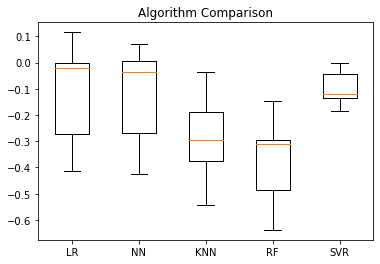

In [35]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [36]:
# KNN и RF работают одинаково хорошо. Но мы любим RF:::
# решетчатый поиск лучших параметров для RF
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
param_search = {'n_estimators': [5, 10, 15],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [i for i in range(5,15)]}

tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_ # лучшая модель

In [37]:
print(best_model)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=15)


In [38]:
# проверка лучшей модели на тестовых данных - расчет стандартных функций качества
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.1294
mean_squared_log_error:  0.0137
r2:  0.0816
MAE:  138.8905
MSE:  24871.3152
RMSE:  157.7064


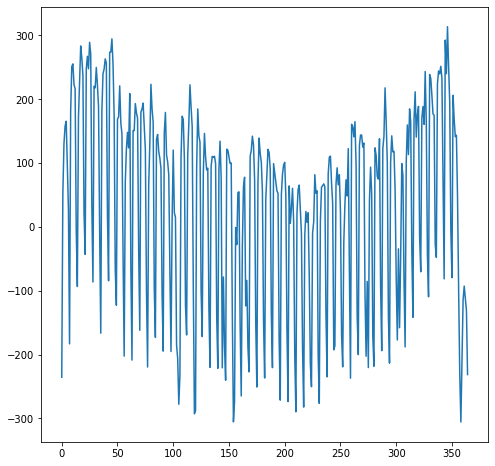

In [39]:
# визуализация ошибки предсказания ППЭ
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(y_true-y_pred)
plt.show()

In [40]:
# Убрать тренд окном

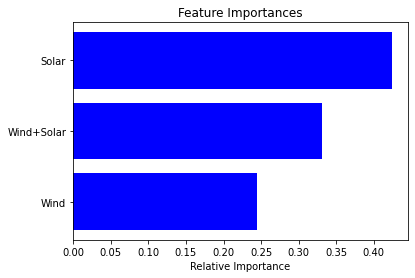

In [41]:
# проверка важности признаков
imp = best_model.feature_importances_ # рассчет значений важности признаков (от 0 до 1)
features = X_train.columns
indices = np.argsort(imp) # выдает индексы эл-тов массива по их возрастанию
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() # вот те раз!

In [42]:
# Чтобы ошибки не мозолили глаза
import warnings
warnings.filterwarnings('ignore')

# Используем трюк с пальцами

In [43]:
# новый dataframe - столбец consumption будет выходной переменной задачи регрессии (ее будем предсказывать в тесте)
data_consumption = data[['Consumption']]


# создадим признаки для обучения классификатора - "вчерашние" показания
# т.е. обучающий набор будет иметь только эти признаки, классификатор "не знает", как они получились,
# но связи - правила, между выходной переменной регрессии - потребление э.э., и этими признаками есть однозначные
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Consumption'].shift()
data_consumption

,Consumption,Yesterday
Date,,
2006-01-01,1069.18400,NaN
2006-01-02,1380.52100,1069.18400
2006-01-03,1442.53300,1380.52100
2006-01-04,1457.21700,1442.53300
2006-01-05,1477.13100,1457.21700
...,...,...
2017-12-27,1263.94091,1130.11683
2017-12-28,1299.86398,1263.94091
2017-12-29,1295.08753,1299.86398


In [44]:
# еще признаки: разность (difference) между вчерашними и позавчерашними показаниями
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()
data_consumption

,Consumption,Yesterday,Yesterday_Diff
Date,,,
2006-01-01,1069.18400,NaN,NaN
2006-01-02,1380.52100,1069.18400,NaN
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


In [45]:
# dropping NAs
data_consumption = data_consumption.dropna()
data_consumption # новый dataframe

,Consumption,Yesterday,Yesterday_Diff
Date,,,
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
2006-01-06,1403.42700,1477.13100,19.91400
2006-01-07,1300.28700,1403.42700,-73.70400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


In [46]:
X_train_Yest = data_consumption[:'2016'].drop(['Consumption'], axis = 1)
y_train_Yest = data_consumption.loc[:'2016', 'Consumption']
X_test_Yest = data_consumption['2017'].drop(['Consumption'], axis = 1)
y_test_Yest = data_consumption.loc['2017', 'Consumption']

In [47]:
print(X_train_Yest.shape)
print(y_train_Yest.shape)
print(X_test_Yest.shape)
print(y_test_Yest.shape)

(4016, 2)
(4016,)
(365, 2)
(365,)


In [48]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs'))) #neural network
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

In [49]:
# Оценить каждую модель по очереди
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    # TimeSerieSplit принимает количество блоков для разделения. Т.к. обучающие данные имеют 11 лет (2006-2016)
    # установить n_splits = 5
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_val_score(model, X_train_Yest, y_train_Yest, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.383325 (0.035115)
NN: 0.404213 (0.095276)
KNN: 0.666331 (0.051082)
RF: 0.639675 (0.067647)
SVR: -0.056214 (0.064480)


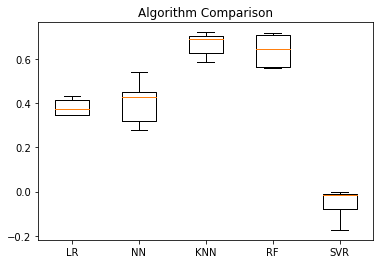

In [50]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [51]:
# KNN и RF работают одинаково хорошо. Но мы любим RF:::
# решетчатый поиск лучших параметров для RF
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
param_search = {'n_estimators': [25, 50, 75, 100],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [i for i in range(1,10)]}

tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_ # лучшая модель

In [52]:
print(gsearch.best_params_)

{'max_depth': 1, 'max_features': 'auto', 'n_estimators': 75}


In [53]:
# проверка лучшей модели на тестовых данных - расчет стандартных функций качества
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.1542
mean_squared_log_error:  0.0138
r2:  0.0697
MAE:  143.7894
MSE:  25193.6776
RMSE:  158.7252


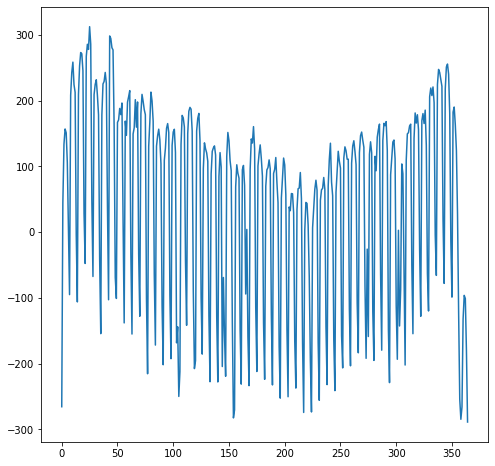

In [54]:
# визуализация ошибки предсказания ППЭ
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(y_true-y_pred)
plt.show()

In [55]:
# Убрать тренд окном

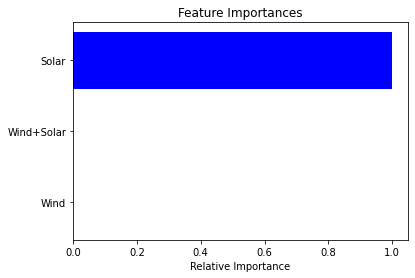

In [56]:
# проверка важности признаков
imp = best_model.feature_importances_ # рассчет значений важности признаков (от 0 до 1)
features = X_train.columns
indices = np.argsort(imp) # выдает индексы эл-тов массива по их возрастанию
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() # вот те раз!

# Прошлая неделя

In [57]:
# добавим признак "позавчера"
data_consumption['Yesterday-1'] = data_consumption['Yesterday'].shift()
# а также столбец разностей "вчера"_МИНУС_"позавчера"
data_consumption['Yesterday-1_Diff'] = data_consumption['Yesterday-1'].diff()
# dropping NAs
data_consumption = data_consumption.dropna()
data_consumption.head()

,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff
Date,,,,,
2006-01-05,1477.131,1457.217,14.684,1442.533,62.012
2006-01-06,1403.427,1477.131,19.914,1457.217,14.684
2006-01-07,1300.287,1403.427,-73.704,1477.131,19.914
2006-01-08,1207.985,1300.287,-103.140,1403.427,-73.704
2006-01-09,1529.323,1207.985,-92.302,1300.287,-103.140


In [58]:
data_consumption_2o_solar_weeklyShift = data_consumption

In [59]:
# еще раз конструирование признаков. в предыдущем занятии наблюдали цикличность данных с периодом = неделя (периодичность)
# т.е. ПЭЭ в понедельники примерно равны, ПЭЭ по вторникам примерно равны, .....
# добавим:
data_consumption_2o_solar_weeklyShift = data_consumption.copy()
data_consumption_2o_solar_weeklyShift['Last_Week'] = data_consumption['Consumption'].shift(7)
data_consumption_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.dropna()
data_consumption_2o_solar_weeklyShift.head()

,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff,Last_Week
Date,,,,,,
2006-01-12,1553.280,1577.176,0.265,1576.911,47.588,1477.131
2006-01-13,1545.002,1553.280,-23.896,1577.176,0.265,1403.427
2006-01-14,1359.945,1545.002,-8.278,1553.280,-23.896,1300.287
2006-01-15,1265.475,1359.945,-185.057,1545.002,-8.278,1207.985
2006-01-16,1563.738,1265.475,-94.470,1359.945,-185.057,1529.323


In [60]:
# Опять повторяем все этапы Train / Test + GridSearch + Проверка работоспособности

X_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.loc[:'2016', 'Consumption']
X_test = data_consumption_2o_solar_weeklyShift['2017':].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o_solar_weeklyShift.loc['2017':, 'Consumption']
X_train_2o_solar_weeklyShift.head()

,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff,Last_Week
Date,,,,,
2006-01-12,1577.176,0.265,1576.911,47.588,1477.131
2006-01-13,1553.280,-23.896,1577.176,0.265,1403.427
2006-01-14,1545.002,-8.278,1553.280,-23.896,1300.287
2006-01-15,1359.945,-185.057,1545.002,-8.278,1207.985
2006-01-16,1265.475,-94.470,1359.945,-185.057,1529.323


In [61]:
model = RandomForestRegressor()
param_search = {'n_estimators': [20, 50, 100],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [i for i in range(5,15)]}

tscv = TimeSeriesSplit(n_splits=5)

gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2o_solar_weeklyShift, y_train_2o_solar_weeklyShift)

best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [62]:
print(gsearch.best_params_)

{'max_depth': 13, 'max_features': 'log2', 'n_estimators': 100}


In [63]:
# Оценить каждую модель по очереди
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    # TimeSerieSplit принимает количество блоков для разделения. Т.к. обучающие данные имеют 11 лет (2006-2016)
    # установить n_splits = 5
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_val_score(model, X_train_Yest, y_train_Yest, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.383325 (0.035115)
NN: 0.518974 (0.207869)
KNN: 0.666331 (0.051082)
RF: 0.649622 (0.050861)
SVR: -0.056214 (0.064480)


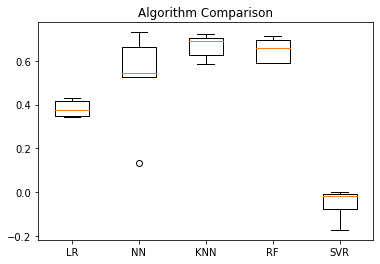

In [64]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [65]:
predRF = best_model.predict(X_test)  # Предсказание наилучшего Леса. ниже понадобится

In [66]:
# качество еще выше
#Было : explained_variance: 0.846
# mean_squared_log_error: 0.0024
# r2: 0.846
# MAE: 38.79
# MSE: 4171
# RMSE: 64.58
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.9026
mean_squared_log_error:  0.0016
r2:  0.9026
MAE:  29.5499
MSE:  2638.8107
RMSE:  51.3694


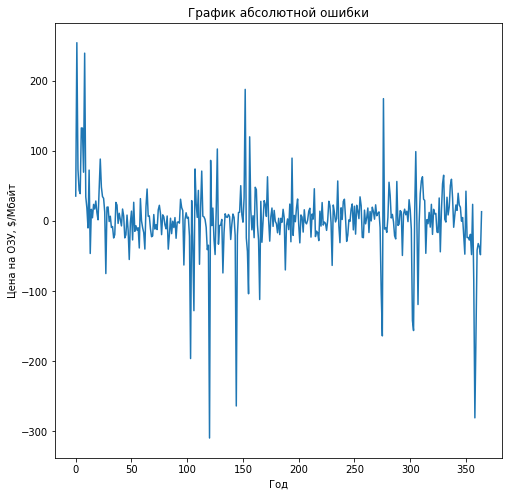

In [67]:
# визуализация ошибки предсказания ППЭ
fig, ax = plt.subplots(figsize=(8,8))
plt.title('График абсолютной ошибки')
plt.ylabel('Цена на ОЗУ, $/Мбайт')
plt.xlabel('Год')
plt.plot(y_true-y_pred)
plt.show()

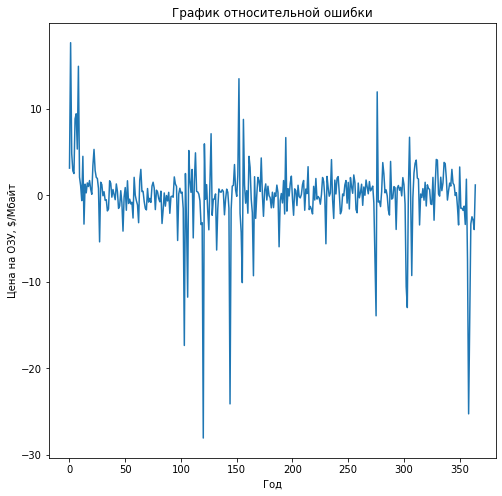

In [68]:
# визуализация ошибки предсказания ППЭ
fig, ax = plt.subplots(figsize=(8,8))
plt.title('График относительной ошибки')
plt.ylabel('Цена на ОЗУ, $/Мбайт')
plt.xlabel('Год')
plt.plot(((y_true-y_pred)/y_true)*100)
plt.show()

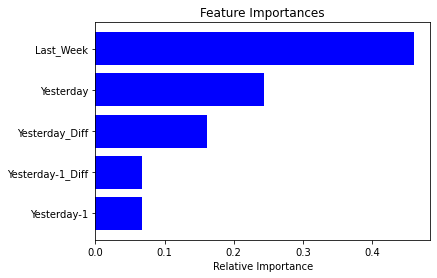

In [69]:
# проверка важности признаков
imp = best_model.feature_importances_ # рассчет значений важности признаков (от 0 до 1)
features = X_train_2o_solar_weeklyShift.columns
indices = np.argsort(imp) # выдает индексы эл-тов массива по их возрастанию
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() # вот те раз!

__Сделать то же самое, что и сверху, но сделать данные по ветру и ветру+солнцу и для сравнения скопировать предыдущие результаты__

In [70]:
# для проверки на стационарность тестом ADF - загрузить это
from statsmodels.tsa.stattools import adfuller

In [71]:
res = adfuller(data_consumption_2o_solar_weeklyShift['Consumption'])
print('Признак: ', ['Consumption'])
print(f'ADF Statistic: {res[0]}')
print(f'p-value: {res[1]}')
if res[1] > 0.05: # 0.05 - гипотеза 5%
    print('Временной ряд НЕ стационарный') # сравнение с p-value
else:
    print('Временной ряд стационарный')

Признак:  ['Consumption']
ADF Statistic: -6.24628108067016
p-value: 4.567609968150519e-08
Временной ряд стационарный


In [72]:
# для простоты работы создаем новые таблицы - целевая переменная с индексом datetime
# с понедельной частотой (слишком много иначе)
# train = data_consumption_2o_solar_weeklyShift.resample('W').mean() # W stands for weekly Среднее
train = data_freq.drop(columns = ['Wind', 'Solar', 'Wind+Solar']).loc[:'2016']
train

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131
...,...
2016-12-27,1289.324
2016-12-28,1294.881
2016-12-29,1295.897


In [73]:
# для простоты работы создаем новые таблицы - целевая переменная с индексом datetime
# тоже понедельное
y_test = data_freq.loc['2017':, 'Consumption']
test = y_test.resample('W').mean() # W stands for weekly Среднее
test[:5]

Date
2017-01-01    1130.413000
2017-01-08    1468.473429
2017-01-15    1544.333571
2017-01-22    1570.934143
2017-01-29    1571.222714
Freq: W-SUN, Name: Consumption, dtype: float64

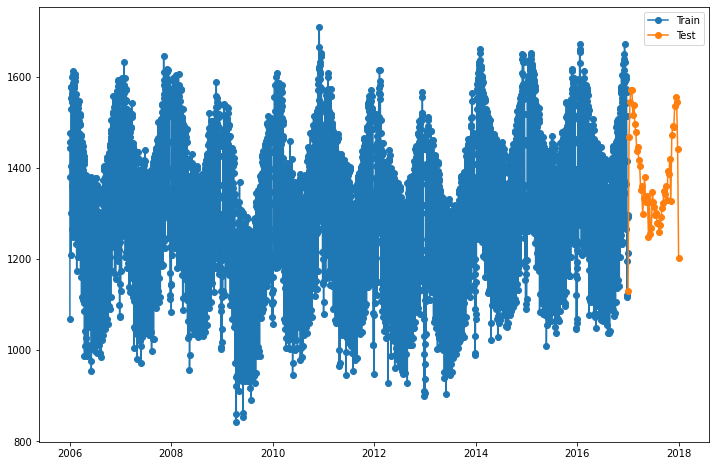

In [74]:
# визуализация обучающих и тестовых данных
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [261]:
from statsmodels.tsa.arima_model import ARMA

# параметры p,q пока задаем вручную
p = 7
d = 1
q = 3

model = ARMA(train, order=(p,q))

In [262]:
results = model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:            Consumption   No. Observations:                 4018
Model:                     ARMA(7, 3)   Log Likelihood              -22757.315
Method:                       css-mle   S.D. of innovations             69.672
Date:                Fri, 18 Jun 2021   AIC                          45538.630
Time:                        00:44:59   BIC                          45614.213
Sample:                    01-01-2006   HQIC                         45565.416
                         - 12-31-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1333.9210     13.153    101.413      0.000    1308.141    1359.701
ar.L1.Consumption     0.0598      0.012      4.956      0.000       0.036       0.083
ar.L2.Consumption    -0.

In [263]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# An ARMA(p,q) + constant model
model = SARIMAX(train, order=(p,d,q), trend='c')

In [264]:
model = SARIMAX(train, order=(p,d,q)).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                 4018
Model:               SARIMAX(7, 1, 3)   Log Likelihood              -22781.913
Date:                Fri, 18 Jun 2021   AIC                          45585.826
Time:                        00:45:08   BIC                          45655.107
Sample:                    01-01-2006   HQIC                         45610.379
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3353      0.044     -7.565      0.000      -0.422      -0.248
ar.L2         -0.4297      0.038    -11.189      0.000      -0.505      -0.354
ar.L3         -0.3657      0.042     -8.771      0.000      -0.447      -0.284
ar.L4         -0.3885      0.036    -10.752      0.000      -0.459      -0.318
ar.L5         -0.3931      0.038    -10.259      0.000      -0.468      -0.318
ar.L6         -0.3107      0.038     -8.261      0.000      -0.384      -0.237
ar.L7          0.4778      0.034     14.045      0.000       0.411       0.544
ma.L1         -0.0428      0.045     -0.944      0.345      -0.132       0.046
ma.L2          0.0215      0.026      0.828      0.407      -0.029       0.072
ma.L3          0.0768      0.020      3.867      0.000       0.038       0.116
sigma2      4943.4735     76.408     64.699      0.000    4793.717    5093.230
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10040.06
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.23
Prob(H) (two-sided):                  0.05   Kurtosis:                        10.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

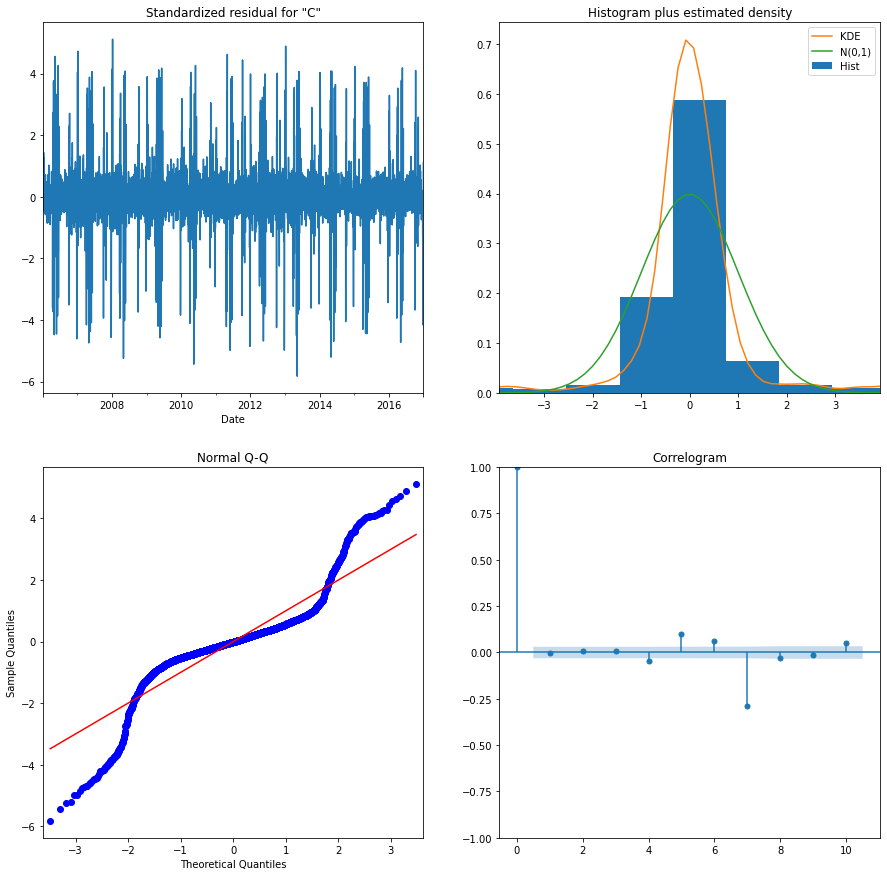

In [265]:
model.plot_diagnostics(figsize=(15,15));

In [266]:
# Model forecast = модель прогноза
# для прогноза в sarimax используетсz get_forecast (steps - кол-во отсчетов, которое берем из теста)
def forecastARIMA(model, steps):
    forecast = model.get_forecast(steps=steps)
    pred_df = forecast.conf_int()
    pred_df['pred'] = forecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred']
    return pred_df

In [267]:
pred_df_Sari = forecastARIMA(model, steps=len(test) + 450)
pred_df_Sari.head()

,lower,upper,pred
2017-01-01,991.251067,1266.860572,1129.055819
2017-01-02,979.654653,1304.215698,1141.935176
2017-01-03,1119.376241,1457.231679,1288.303960
2017-01-04,1124.772591,1473.159888,1298.966239
2017-01-05,1116.927374,1469.223900,1293.075637


In [268]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

pred = pred_df_Sari['pred']
# Calculate MSE
mse = mean_squared_error(pred.head(len(test)), test) # Сравниваем только те предсказание, которые входят в область теста
print('Средний квадрат ошибки :', mse)

Средний квадрат ошибки : 32465.57434821358


In [269]:
y_true = test.values
y_pred = pred_df_Sari['pred']
regression_results(y_true, y_pred.head(len(y_true)))
# хуже намного. как же параметры задать? есть способ их найти - см. с другими датасетами

explained_variance:  -0.153
mean_squared_log_error:  0.0181
r2:  -2.106
MAE:  147.9009
MSE:  32465.5743
RMSE:  180.1821


In [270]:
# построим график прогноза, сравним с реалиями
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')

    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Работа модели', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

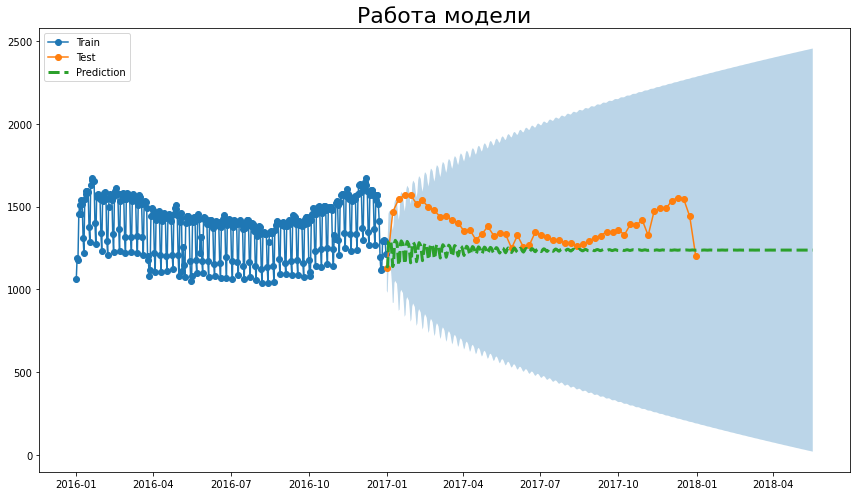

In [271]:
plot_train_test_pred(train['2016':],test,pred_df_Sari);